In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("weather.csv")
df
df['Precip Type'].replace({'rain': 1, 'snow': 0}, inplace=True)

C:\Users\kd02\AppData\Local\Temp\ipykernel_5124\1745028253.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Precip Type'].replace({'rain': 1, 'snow': 0}, inplace=True)
C:\Users\kd02\AppData\Local\Temp\ipykernel_5124\1745028253.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Precip Typ

In [3]:
df
df.columns.tolist()


['Formatted Date',
 'Summary',
 'Precip Type',
 'Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Loud Cover',
 'Pressure (millibars)',
 'Daily Summary']

In [4]:
mode_value = df['Precip Type'].mode()[0]
df['Precip Type'].fillna(mode_value, inplace=True)

# Fill missing values in 'Temperature (C)' column with mean value
mean_temperature = df['Temperature (C)'].mean()
df['Temperature (C)'].fillna(mean_temperature, inplace=True)

# Select columns for features and target
selected_columns = ['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 
                    'Pressure (millibars)', 'Loud Cover', 'Visibility (km)', 
                    'Apparent Temperature (C)']
x = df[selected_columns]
y = df[['Temperature (C)', 'Precip Type']]

C:\Users\kd02\AppData\Local\Temp\ipykernel_5124\1440626450.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Temperature (C)'].fillna(mean_temperature, inplace=True)


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=0)

In [6]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [7]:
y_pred = linear.predict(x_test)

In [8]:
y_pred

array([[14.20009669,  1.0485527 ],
       [13.45442582,  0.95323332],
       [23.34958588,  1.07100151],
       ...,
       [ 0.73554493,  0.64267131],
       [ 8.06864015,  0.7838256 ],
       [16.27649559,  0.98055187]])

In [9]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.480488313971707


Mean Squared Error: 0.480488313971707
Root Mean Squared Error: 0.693172643698312
Mean Absolute Error: 0.46217491831859037


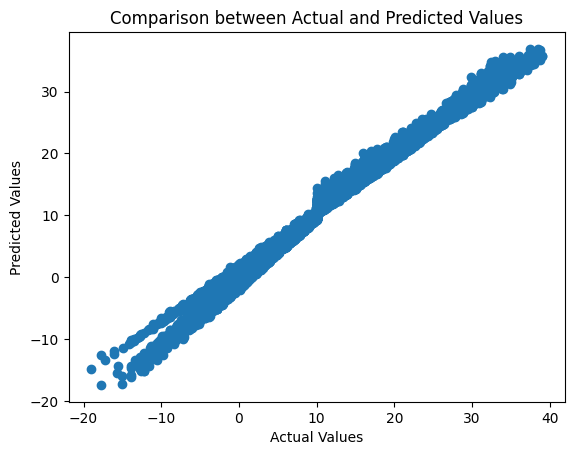

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Comparison between Actual and Predicted Values")
plt.show()